In [4]:
import numpy as np

np.random.seed(1)
x = np.random.normal(size =100)
epsilon = np.random.normal(size=100)
y = x - 2 * x**2 + epsilon

n = number of observations = 100

p = number of predictors = 2 ($X$ and $X^2$)

$Y= X - 2 X^2 + \epsilon$

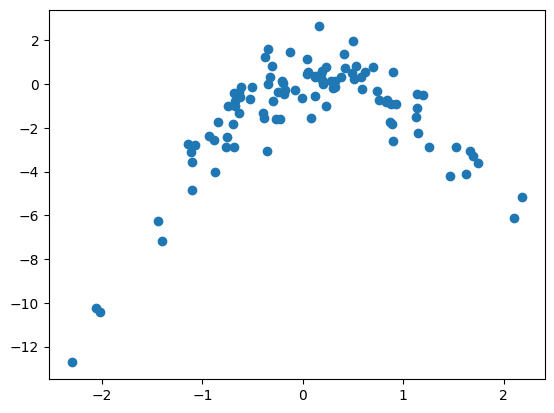

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x, y)